In [4]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv, k_fold_cv_with_deviance
from scripts.data_preprocessing import load_data, exclude_outliers
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered, outliers = exclude_outliers(X, y)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.001, 0.1]
}


Number of duplicates: 4


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers:  14


Fitting 6 folds for each of 729 candidates, totalling 4374 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_impurity_decrease': 0.1, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


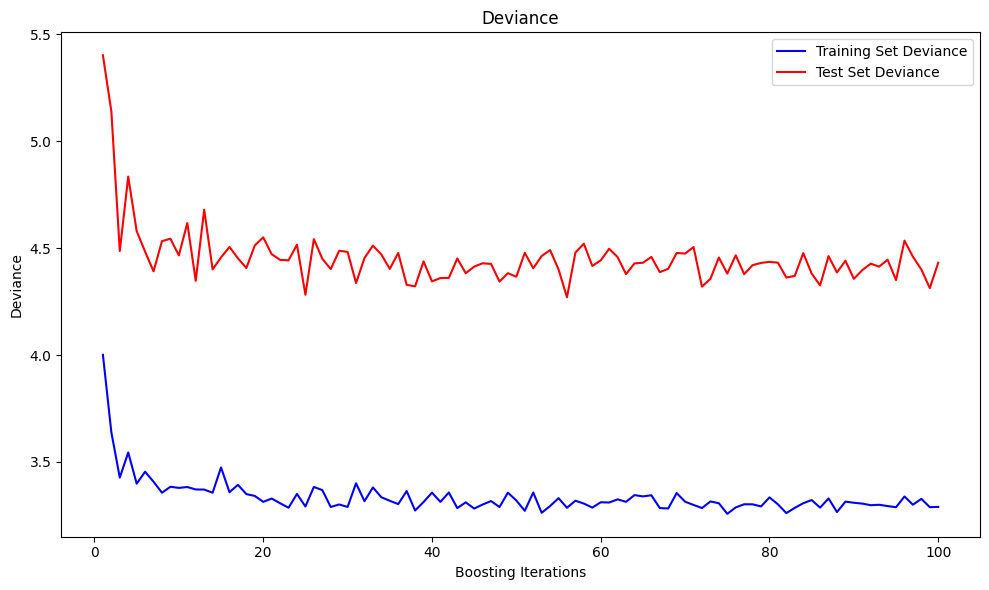

In [2]:
model = RandomForestRegressor()
k_fold_cv_with_deviance(X, y, model, 6, param_grid)


6-fold
R squared (CV): 0.21929299771544397
Average MSE (CV): 93.5232090673964
Average RMSE (CV): 9.67073984074623
Average MAE (CV): 4.807260887230096


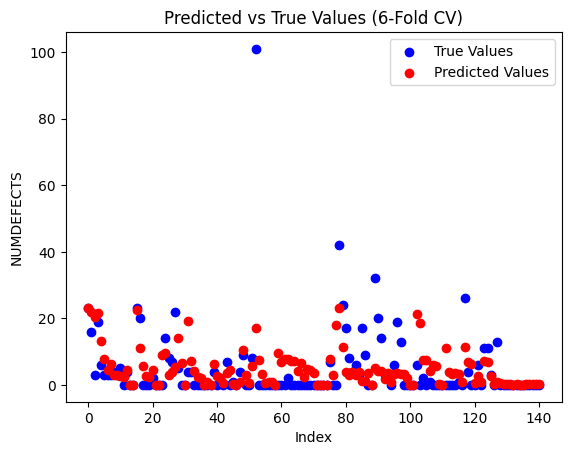

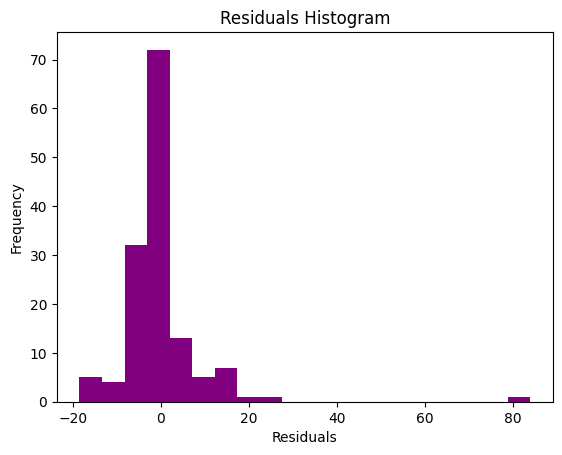

In [5]:
# Initialize the model
best_hyperparameters = {
   'max_depth': None,
    'max_features': 'log2',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 100,
    'min_impurity_decrease': 0.1
}

rf = RandomForestRegressor(**best_hyperparameters)

# Train the model - outliers included
# K-Fold CV
print('\n6-fold')
k_fold_results = k_fold_cv(X, y, rf, cv=6)


LOOCV
R squared (LOOCV): 0.26433103202492336
Average MSE (LOOCV): 88.12796925734693
Average RMSE (LOOCV): 9.38764982609316
Average MAE (LOOCV): 4.481844200198462


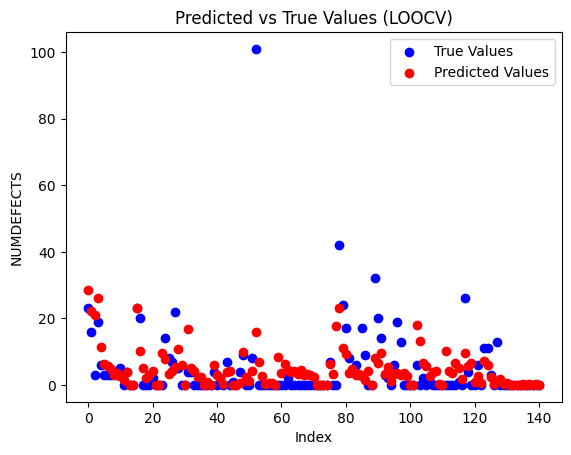

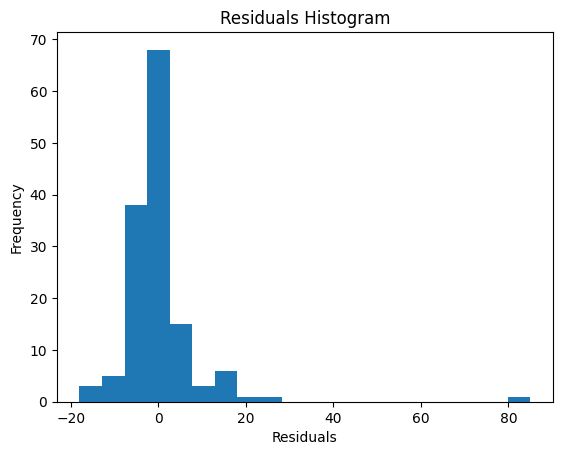

In [7]:
rf2 = RandomForestRegressor(**best_hyperparameters)
# LOOCV
print('LOOCV')
loocv_results = loocv(X, y, rf2)

In [8]:
# Creating a comparison table
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric      LOOCV     6-Fold
0     R2   0.264331   0.131313
1    MSE  88.127969  92.890955
2   RMSE   9.387650   9.637995
3    MAE   4.481844   4.884723


LOOCV
R squared (LOOCV): 0.26543321365216666
Average MSE (LOOCV): 30.500029103876617
Average RMSE (LOOCV): 5.522683143534184
Average MAE (LOOCV): 3.491190045343151


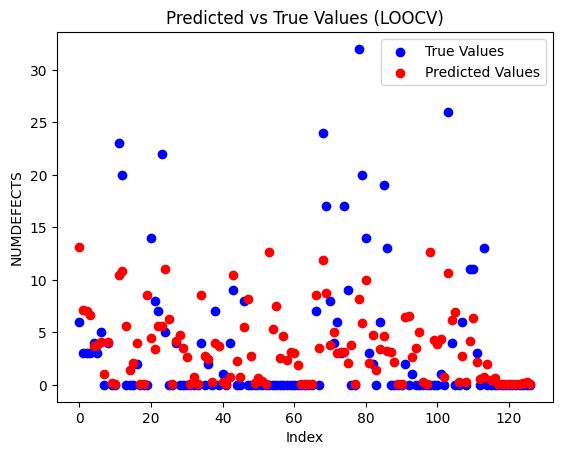

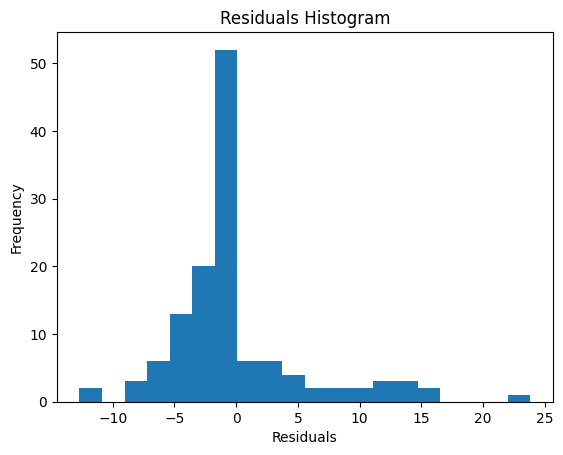


6-fold
R squared (CV): 0.14388420007733838
Average MSE (CV): 35.546879193589625
Average RMSE (CV): 5.962120360542013
Average MAE (CV): 3.845049936309669


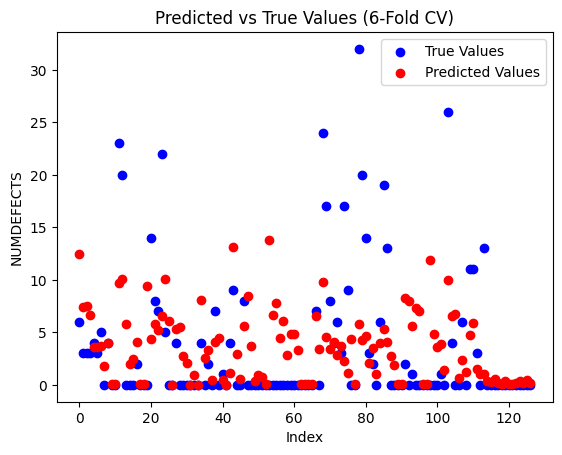

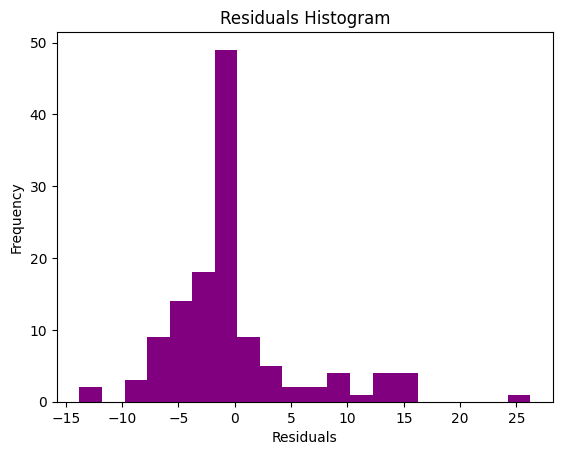

In [9]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, rf2)

print('\n6-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, rf2, 6)

In [10]:
# Creating a comparison table
comparison_table2 = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '6-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table2)

  Metric      LOOCV     6-Fold
0     R2   0.265433  -0.401141
1    MSE  30.500029  35.524424
2   RMSE   5.522683   5.960237
3    MAE   3.491190   3.856813
